# Car Price Prediction with Machine Learning
The price of a car depends on a lot of factors like price of a car,features of the car,horsepower and the mileage it gives and many more.Car price prediction is one of the major research areas in the machine learning 

In [34]:
#importing the packages- np,pd,sns,warnings,LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
import matplotlib.pyplot as plt

In [35]:
#loading the dataset
df=pd.read_csv('CarPrice.csv')

In [36]:
df.head() #printing the dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


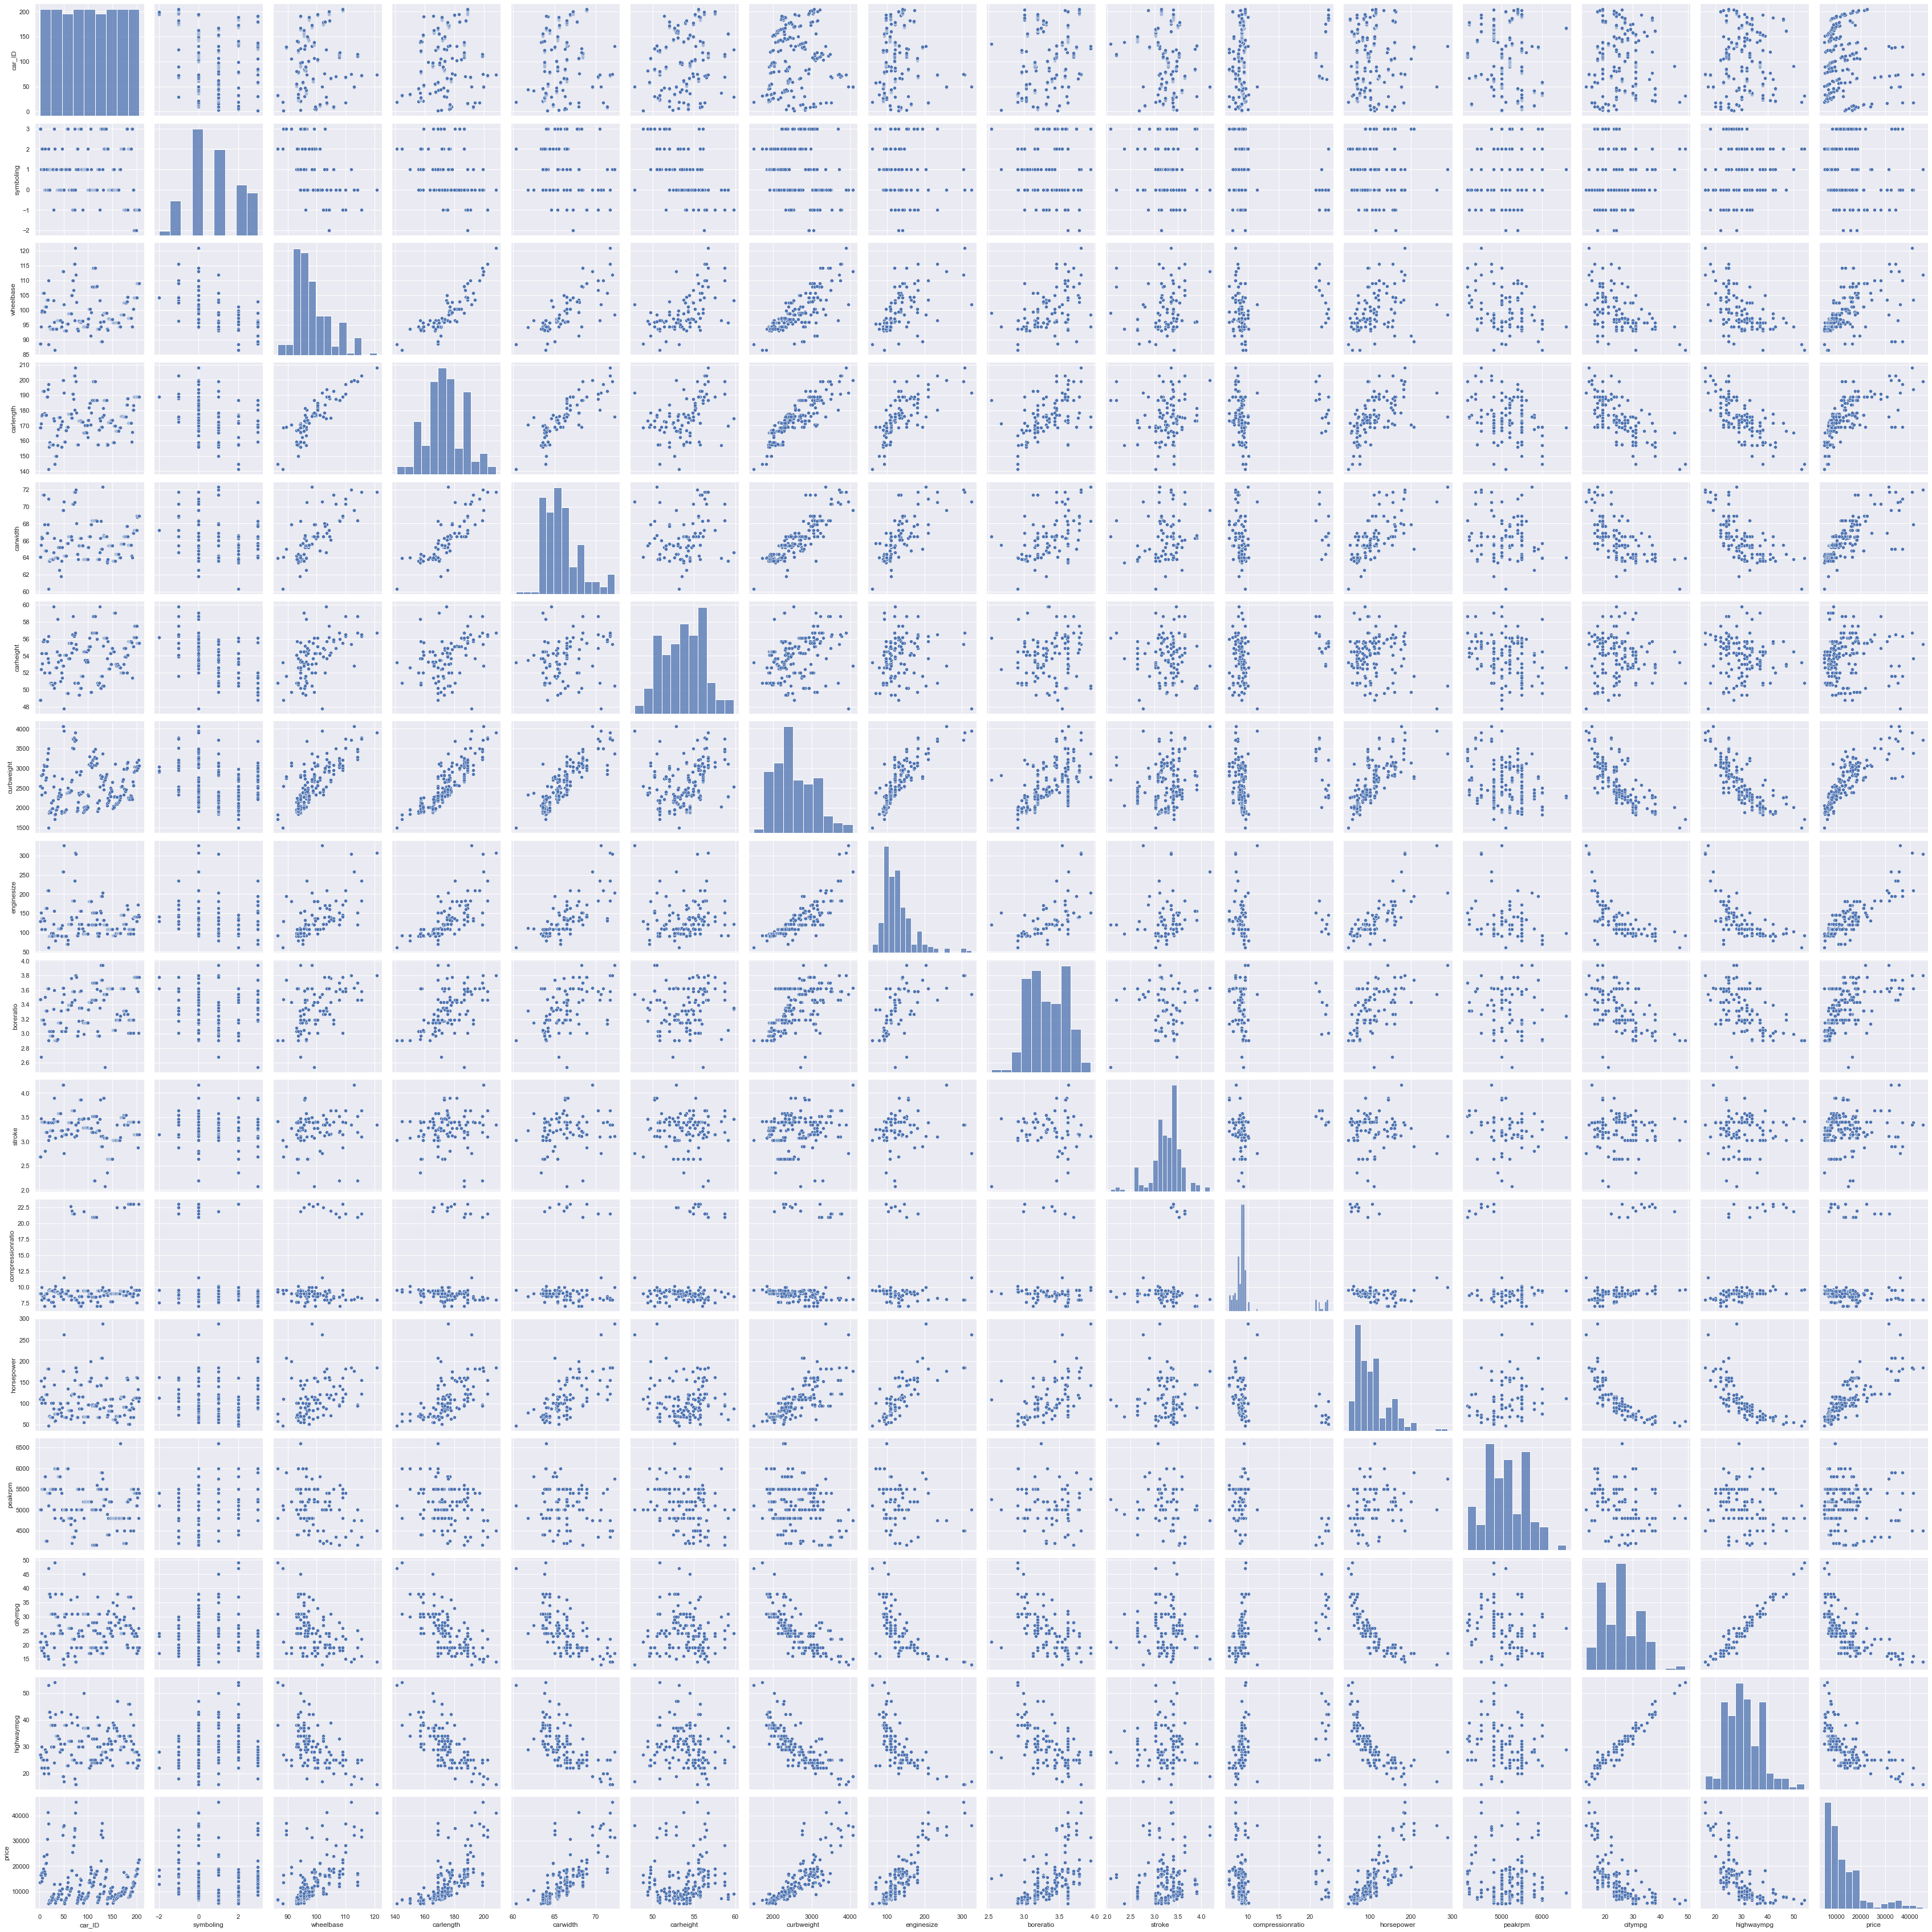

In [37]:
sns.set()
sns.pairplot(df, size = 3)
plt.show()

In [38]:
#Feature Scaling
df.iloc[:,2]=lb.fit_transform(df.iloc[:,2]) #iloc- index location
df.iloc[:,3]=lb.fit_transform(df.iloc[:,3])
df.iloc[:,5]=lb.fit_transform(df.iloc[:,5])
df.iloc[:,4]=lb.fit_transform(df.iloc[:,4])
df.iloc[:,7]=lb.fit_transform(df.iloc[:,7])
df.iloc[:,8]=lb.fit_transform(df.iloc[:,8])
df.iloc[:,17]=lb.fit_transform(df.iloc[:,17])
df.iloc[:,6]=lb.fit_transform(df.iloc[:,6])
df.iloc[:,14]=lb.fit_transform(df.iloc[:,14])
df.iloc[:,15]=lb.fit_transform(df.iloc[:,15])


In [39]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [40]:
x=df.iloc[:,1:-1]   #x is for independent variables 
y=df.iloc[:,-1]      #y is the dependent variable(target value)

In [41]:
x.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,2,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,3,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,1,0,1,2,2,0,94.5,171.2,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,4,1,0,0,3,1,0,99.8,176.6,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,5,1,0,0,3,0,0,99.4,176.6,...,1,136,5,3.19,3.40,8.0,115,5500,18,22


In [42]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [43]:
#Train- Test- Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #splitting the dataset for training and testing

In [44]:
print('Shape of x_train=',x_train.shape)
print('Shape of x_test=',x_test.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of y_test=',y_test.shape)

Shape of x_train= (164, 24)
Shape of x_test= (41, 24)
Shape of y_train= (164,)
Shape of y_test= (41,)


In [71]:
#Training the ML Model- using DECISION TREE REGRESSION ALGORITHM(Supervised Learning) 
from sklearn import tree
regressor=tree.DecisionTreeRegressor(criterion='mse',max_depth=20)
regressor.fit(x_train,y_train)
score=regressor.score(x_test,y_test)    #SCORE- to find the accuracy of the model 
print(score*100)            #the accuracy of the ML model is above 95%

85.6143079165421


Prediction of Car Price

In [46]:
x_test.iloc[-1,:] #independent data of the car 

symboling              0.00
CarName               12.00
fueltype               1.00
aspiration             0.00
doornumber             0.00
carbody                3.00
drivewheel             2.00
enginelocation         0.00
wheelbase            101.20
carlength            176.80
carwidth              64.80
carheight             54.30
curbweight          2765.00
enginetype             3.00
cylindernumber         3.00
enginesize           164.00
fuelsystem             5.00
boreratio              3.31
stroke                 3.19
compressionratio       9.00
horsepower           121.00
peakrpm             4250.00
citympg               21.00
highwaympg            28.00
Name: 13, dtype: float64

In [47]:
regressor.predict([x_test.iloc[-1,:]]) #prediction of the price 

array([20970.])

In [48]:
y_test.iloc[-1] #actual price

21105.0